In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

newfigparams = {
                "figure.figsize": (10,4),
                "figure.dpi": 150,
                "axes.titlesize": 20,
                "axes.labelsize": 11,
                "ytick.labelsize": 11,
                "xtick.labelsize": 11,
                "legend.fontsize": 12,
                "legend.frameon": True,
                "lines.linewidth": 1,
                "axes.grid" : False
                }
plt.rcParams.update(newfigparams)
plt.style.use("dark_background")

# Primer Vistazo

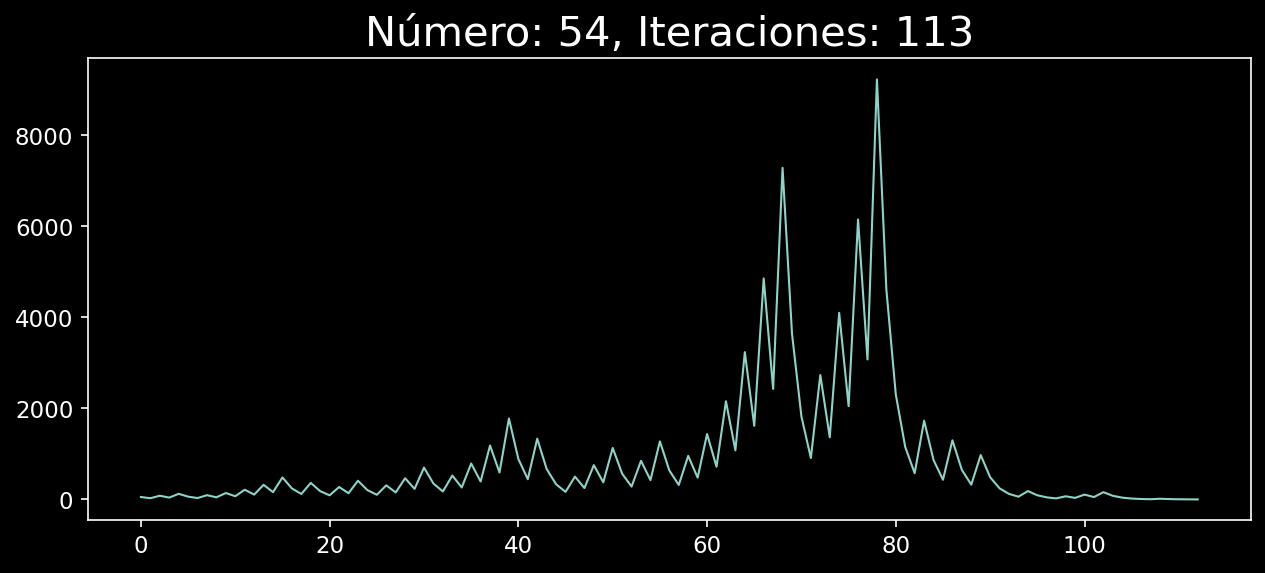

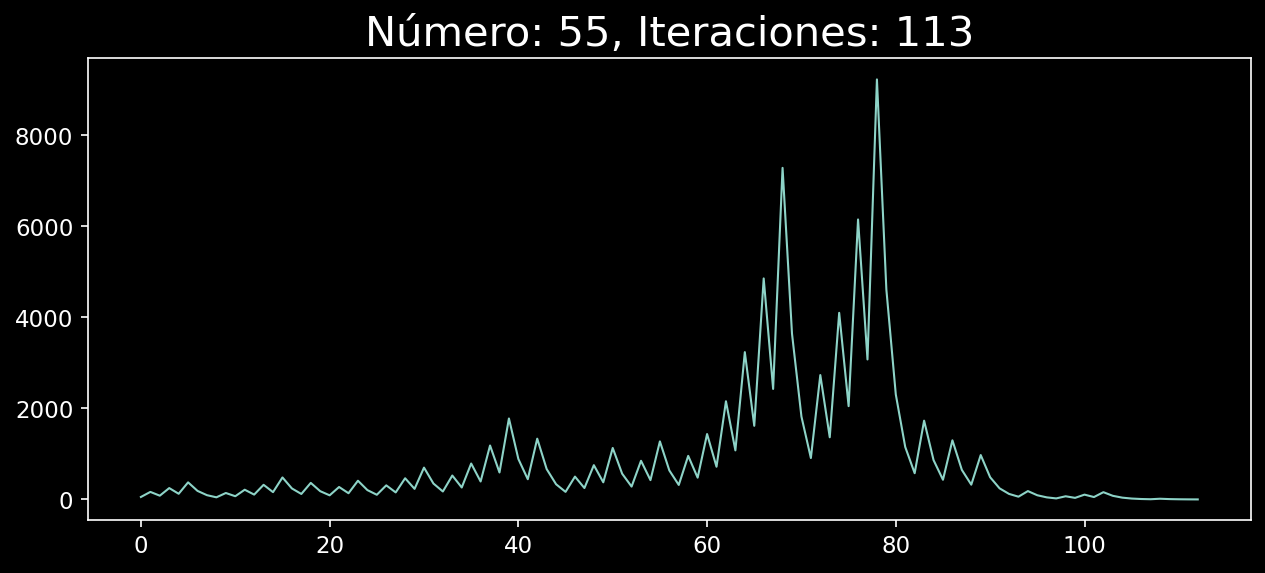

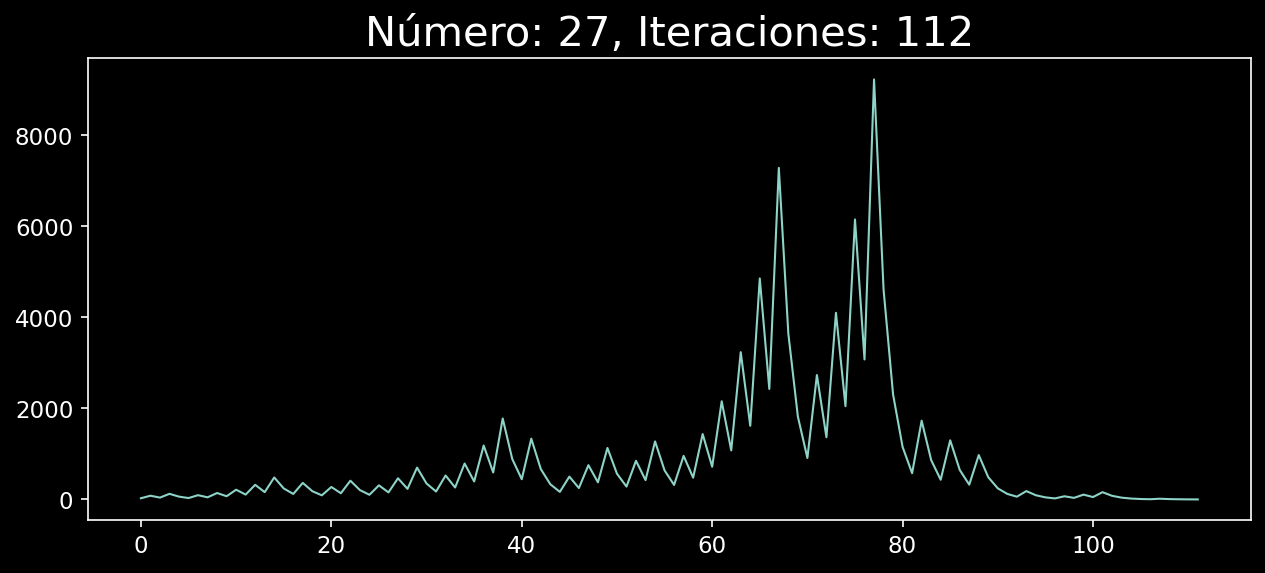

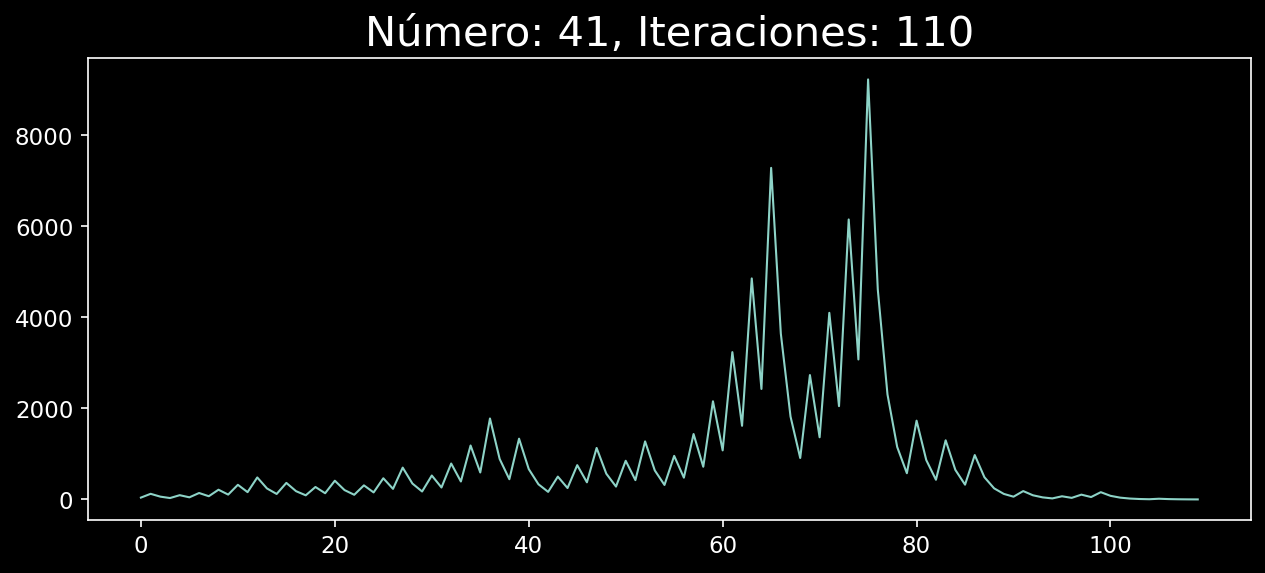

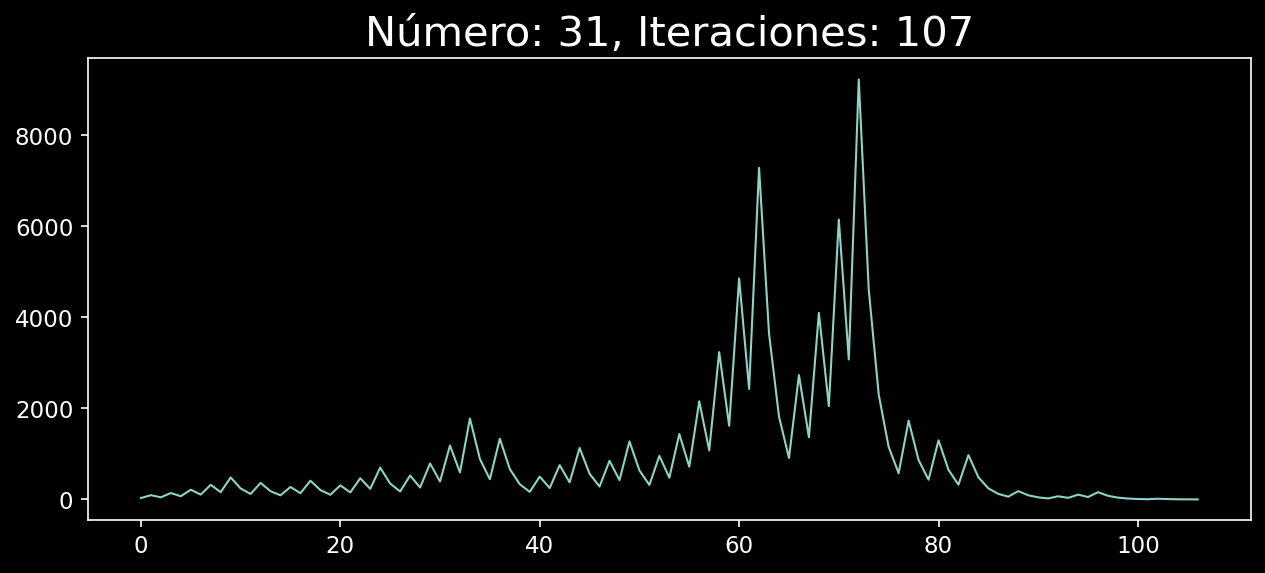

In [3]:
import matplotlib.pyplot as plt

def collatz(n):
    # Crea una lista para guardar las iteraciones
    iteraciones = [n]
    
    # Realiza la iteración hasta que n llegue a 1
    while n != 1:
        # Si n es par, divide por 2
        if n % 2 == 0:
            n = n // 2
        # Si n es impar, multiplica por 3 y suma 1
        else:
            n = 3 * n + 1
        
        # Agrega el número actual a la lista de iteraciones
        iteraciones.append(n)
    
    # Devuelve la lista de iteraciones
    return iteraciones

# Crea una lista para guardar las listas de iteraciones
iteraciones_totales = []

# Itera los números del 1 al 30 y guarda las iteraciones de cada número
for i in range(27, 57):
    iteraciones = collatz(i)
    iteraciones_totales.append(iteraciones)

# Ordena las listas de iteraciones de mayor a menor longitud y toma las 5 primeras
iteraciones_top5 = sorted(iteraciones_totales, key=len, reverse=True)[:5]

# Grafica cada una de las listas de iteraciones en una figura separada
for i, iteraciones in enumerate(iteraciones_top5):
    plt.figure(i)
    plt.plot(iteraciones)
    plt.title(f'Número: {iteraciones[0]}, Iteraciones: {len(iteraciones)}')

plt.show()


# Escala Logaritmica y Mercado de Valores

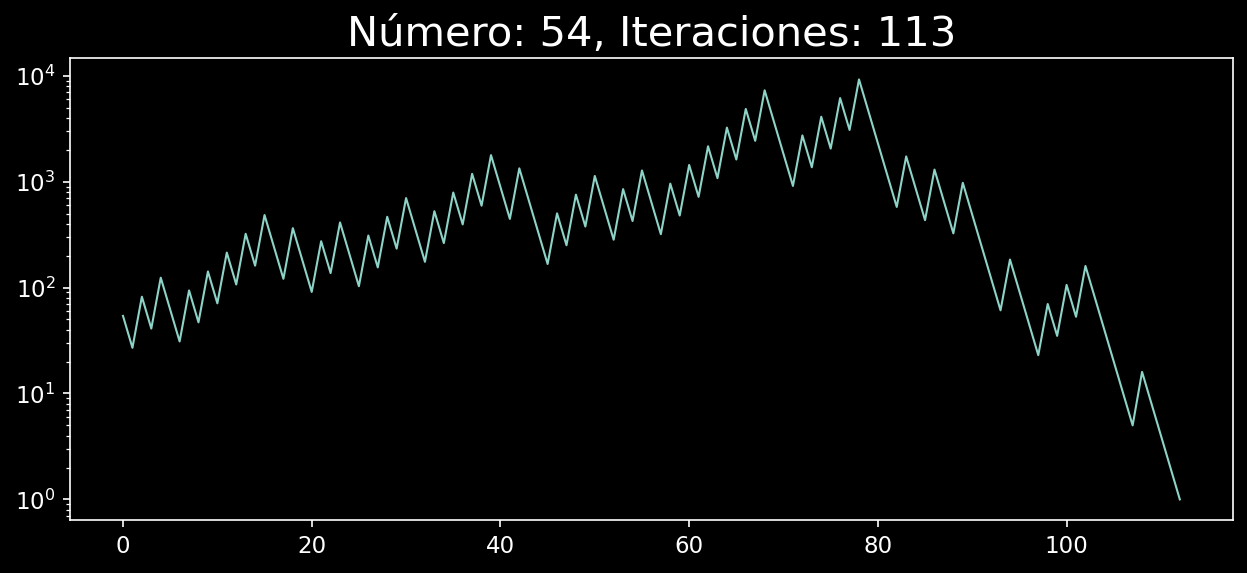

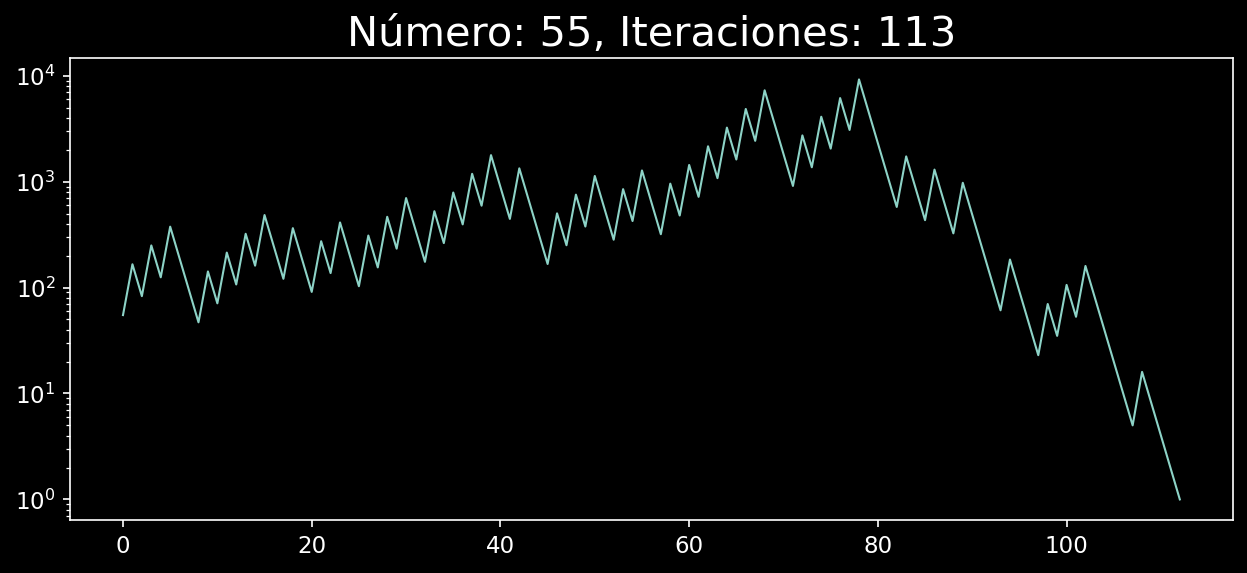

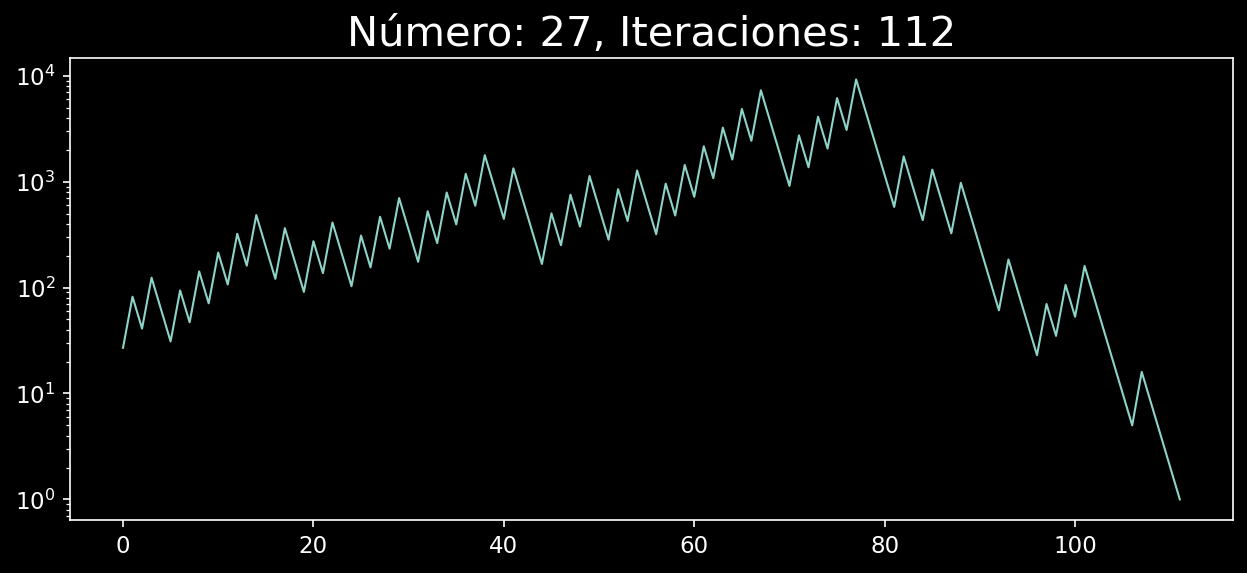

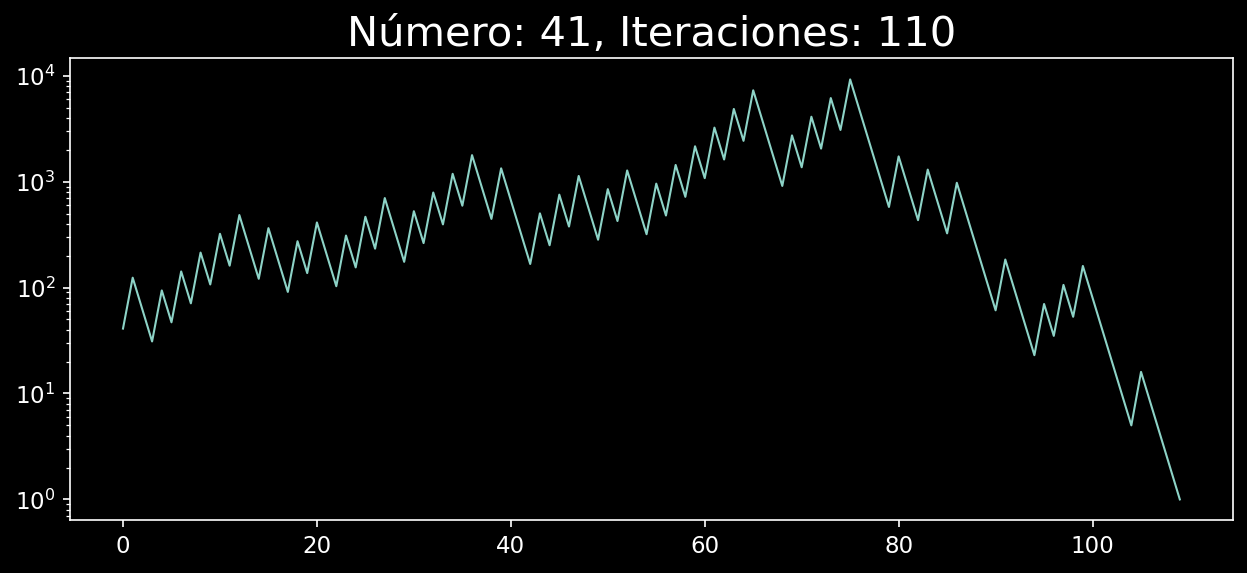

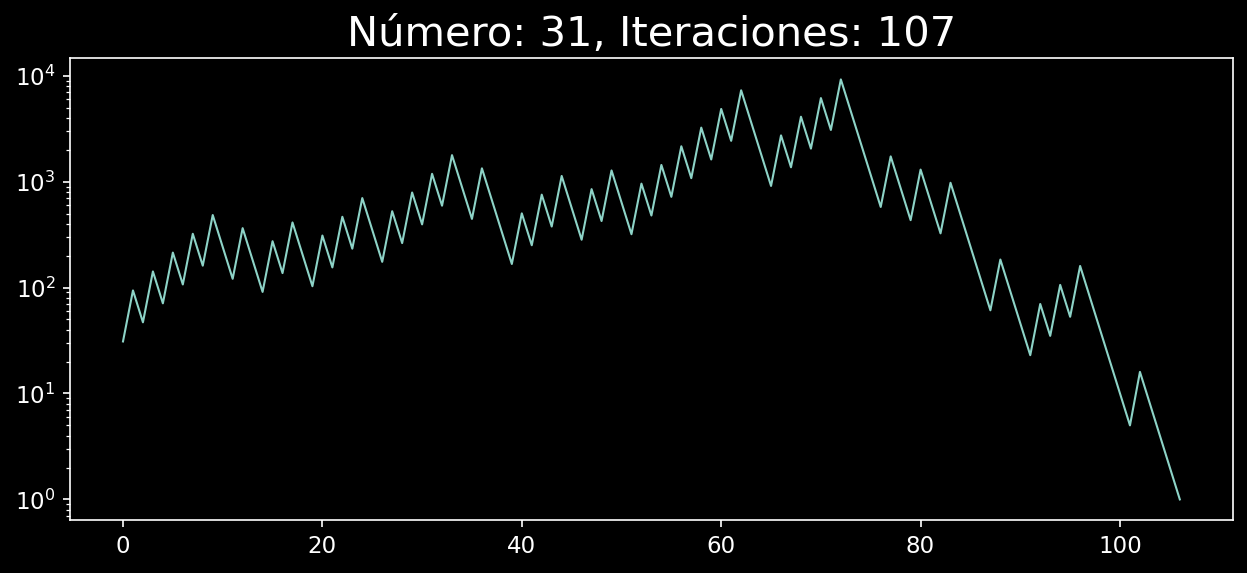

In [4]:
import matplotlib.pyplot as plt


# Crea una lista para guardar las listas de iteraciones
iteraciones_totales = []

# Itera los números del 1 al 30 y guarda las iteraciones de cada número
for i in range(27, 57):
    iteraciones = collatz(i)
    iteraciones_totales.append(iteraciones)

# Ordena las listas de iteraciones de mayor a menor longitud y toma las 5 primeras
iteraciones_top5 = sorted(iteraciones_totales, key=len, reverse=True)[:5]

# Grafica cada una de las listas de iteraciones en una figura separada
for i, iteraciones in enumerate(iteraciones_top5):
    plt.figure(i)
    plt.plot(iteraciones)
    plt.title(f'Número: {iteraciones[0]}, Iteraciones: {len(iteraciones)}')
    plt.yscale('log')


plt.show()

# Grafo Dirigido

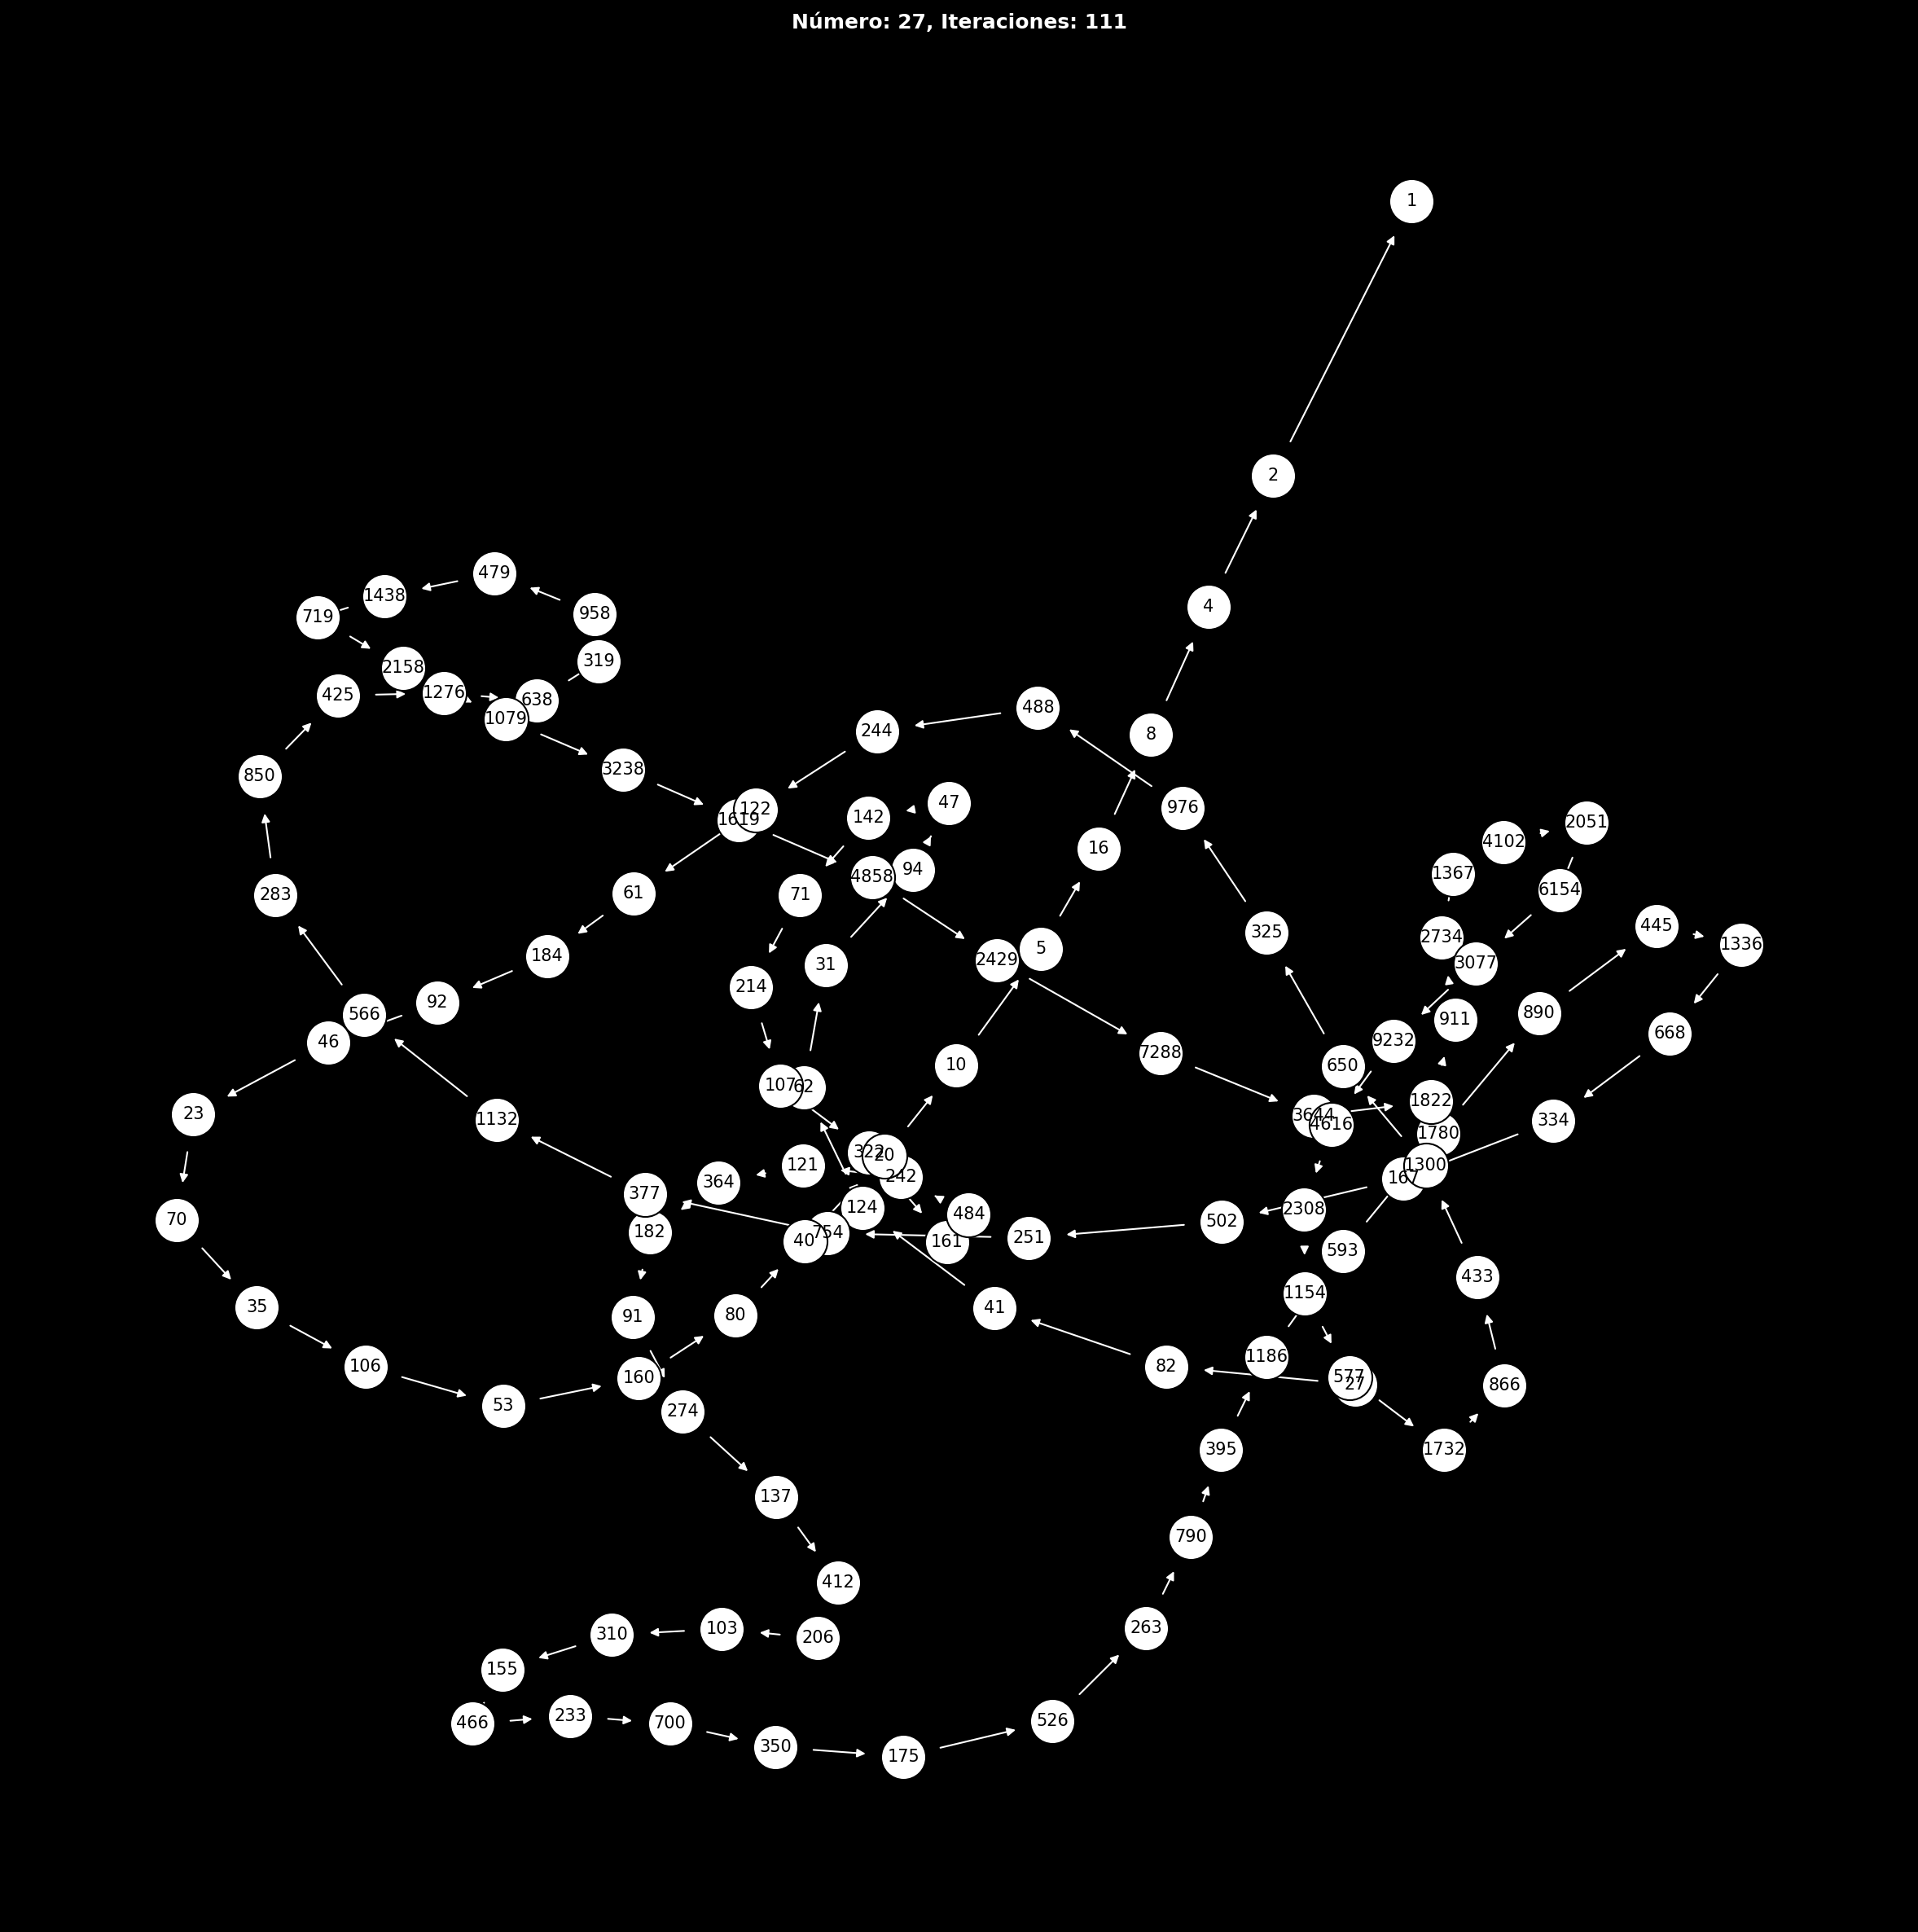

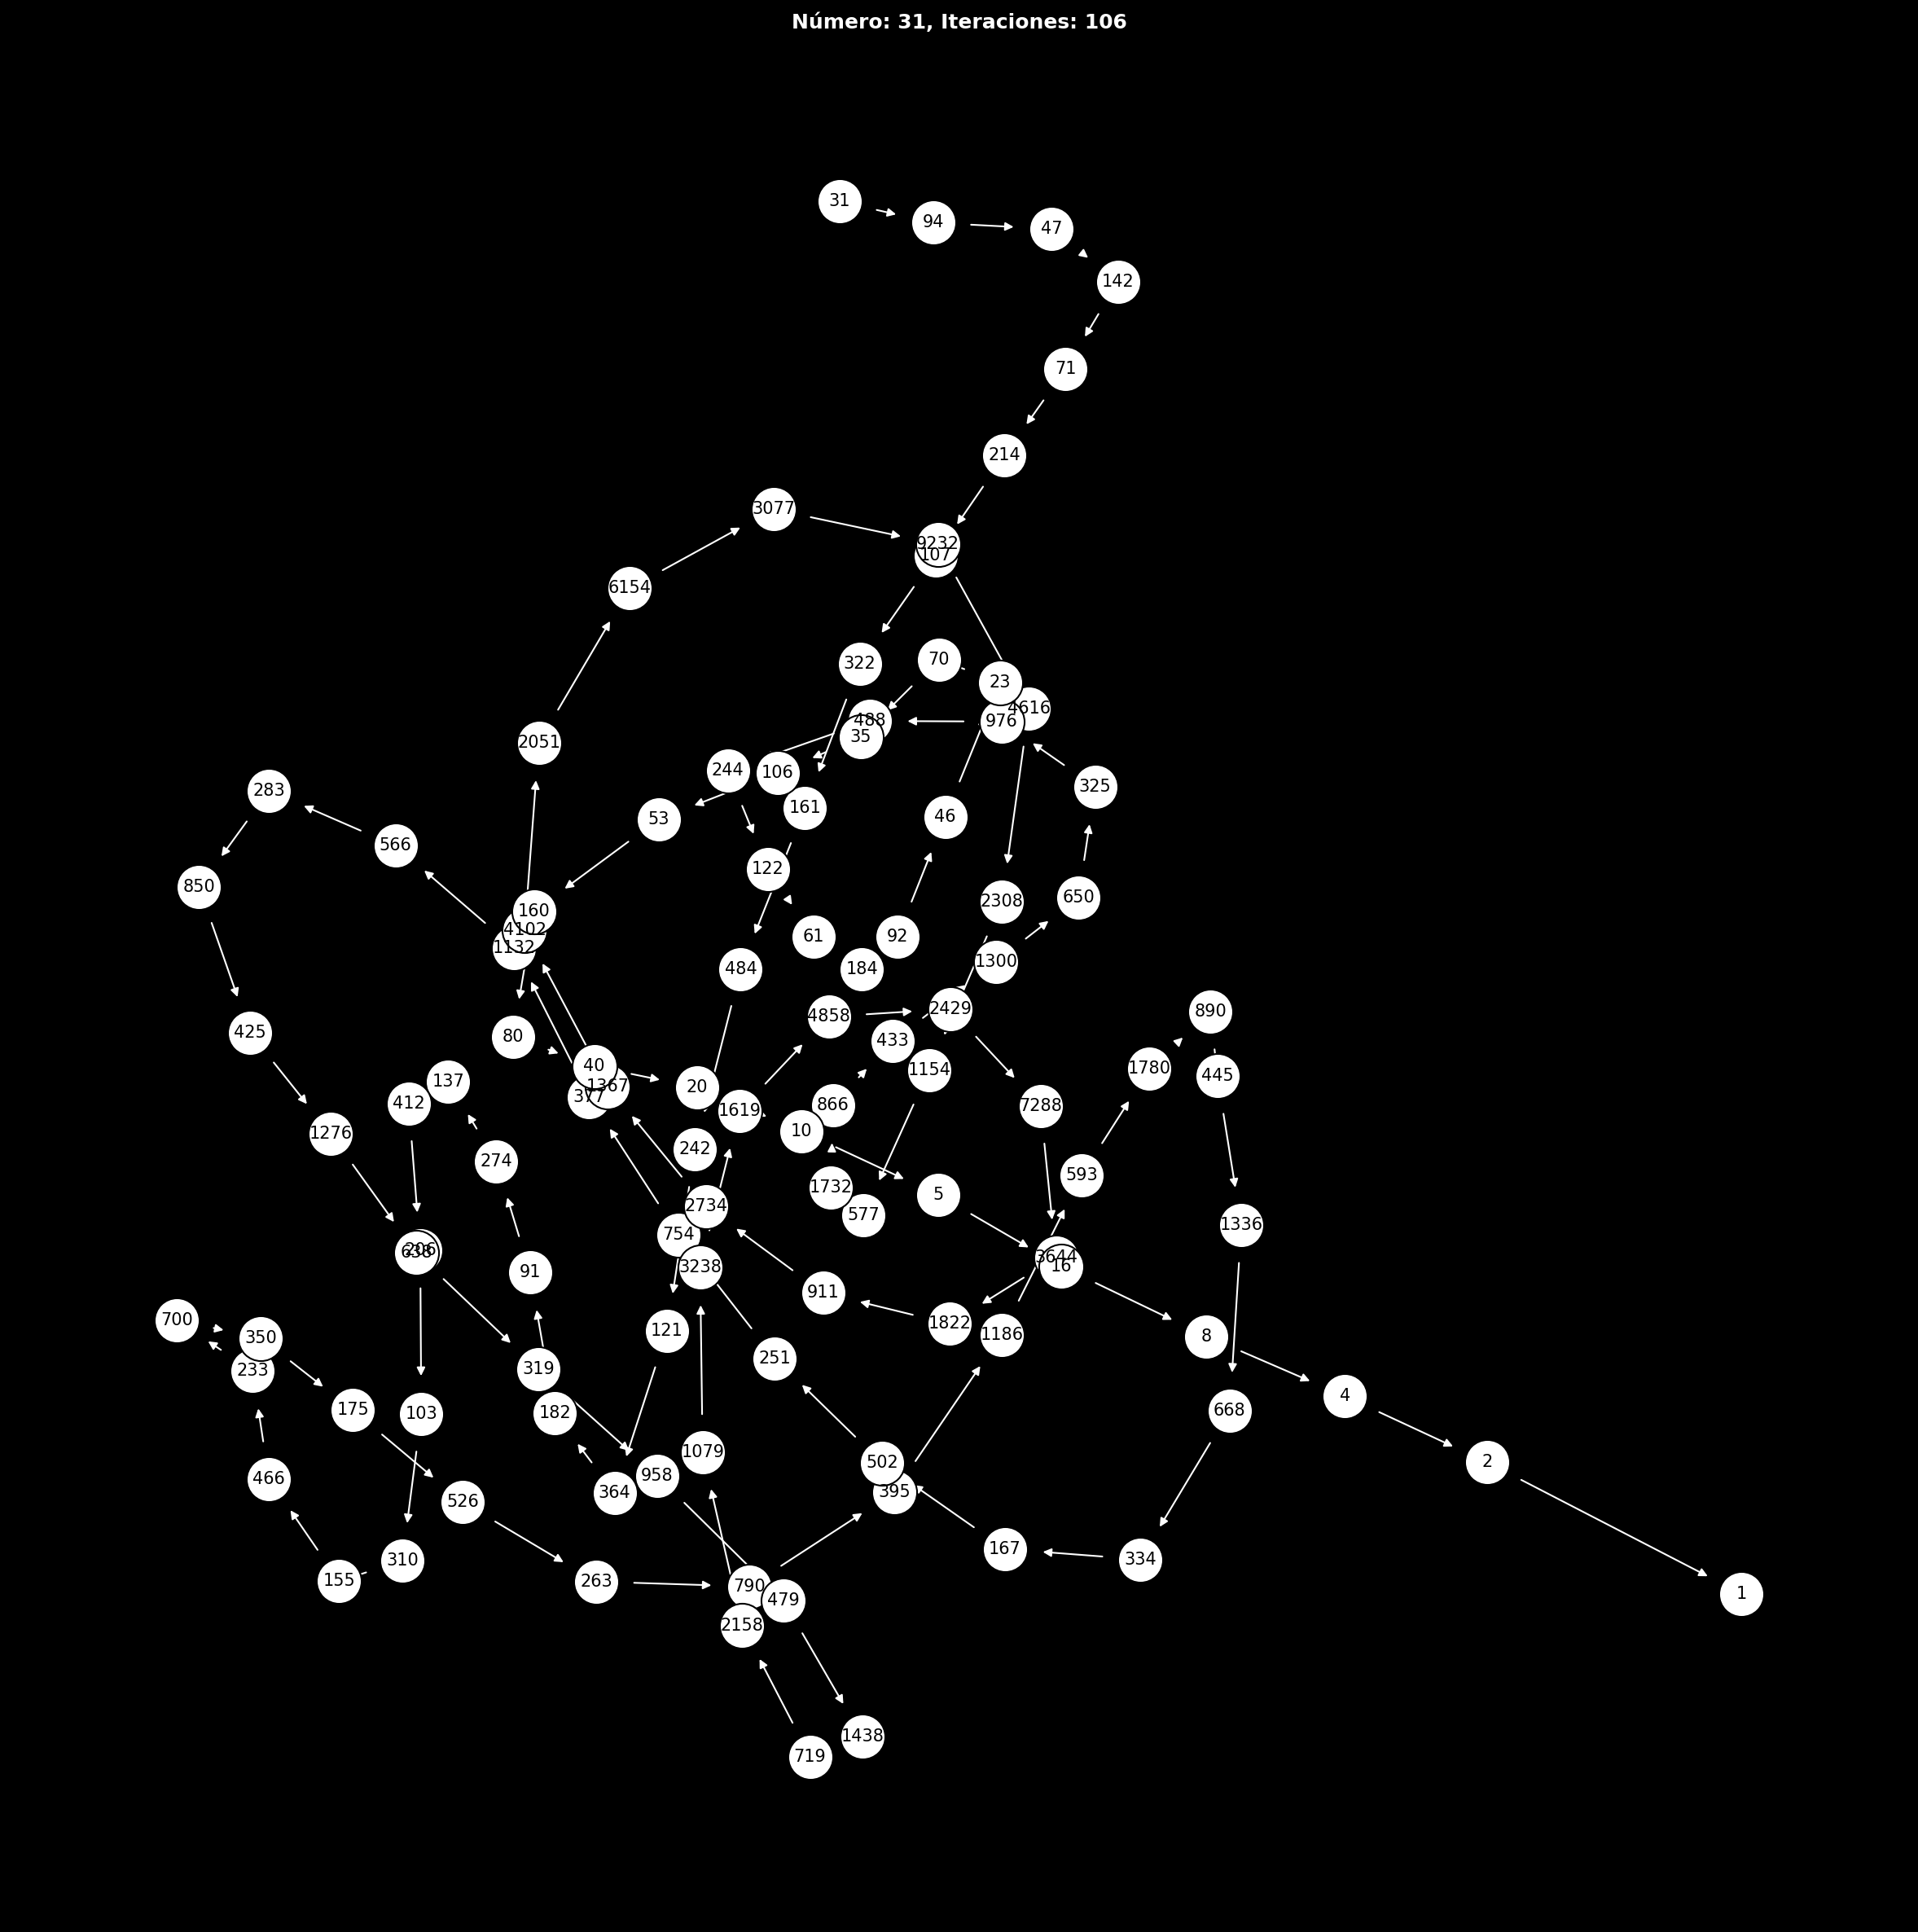

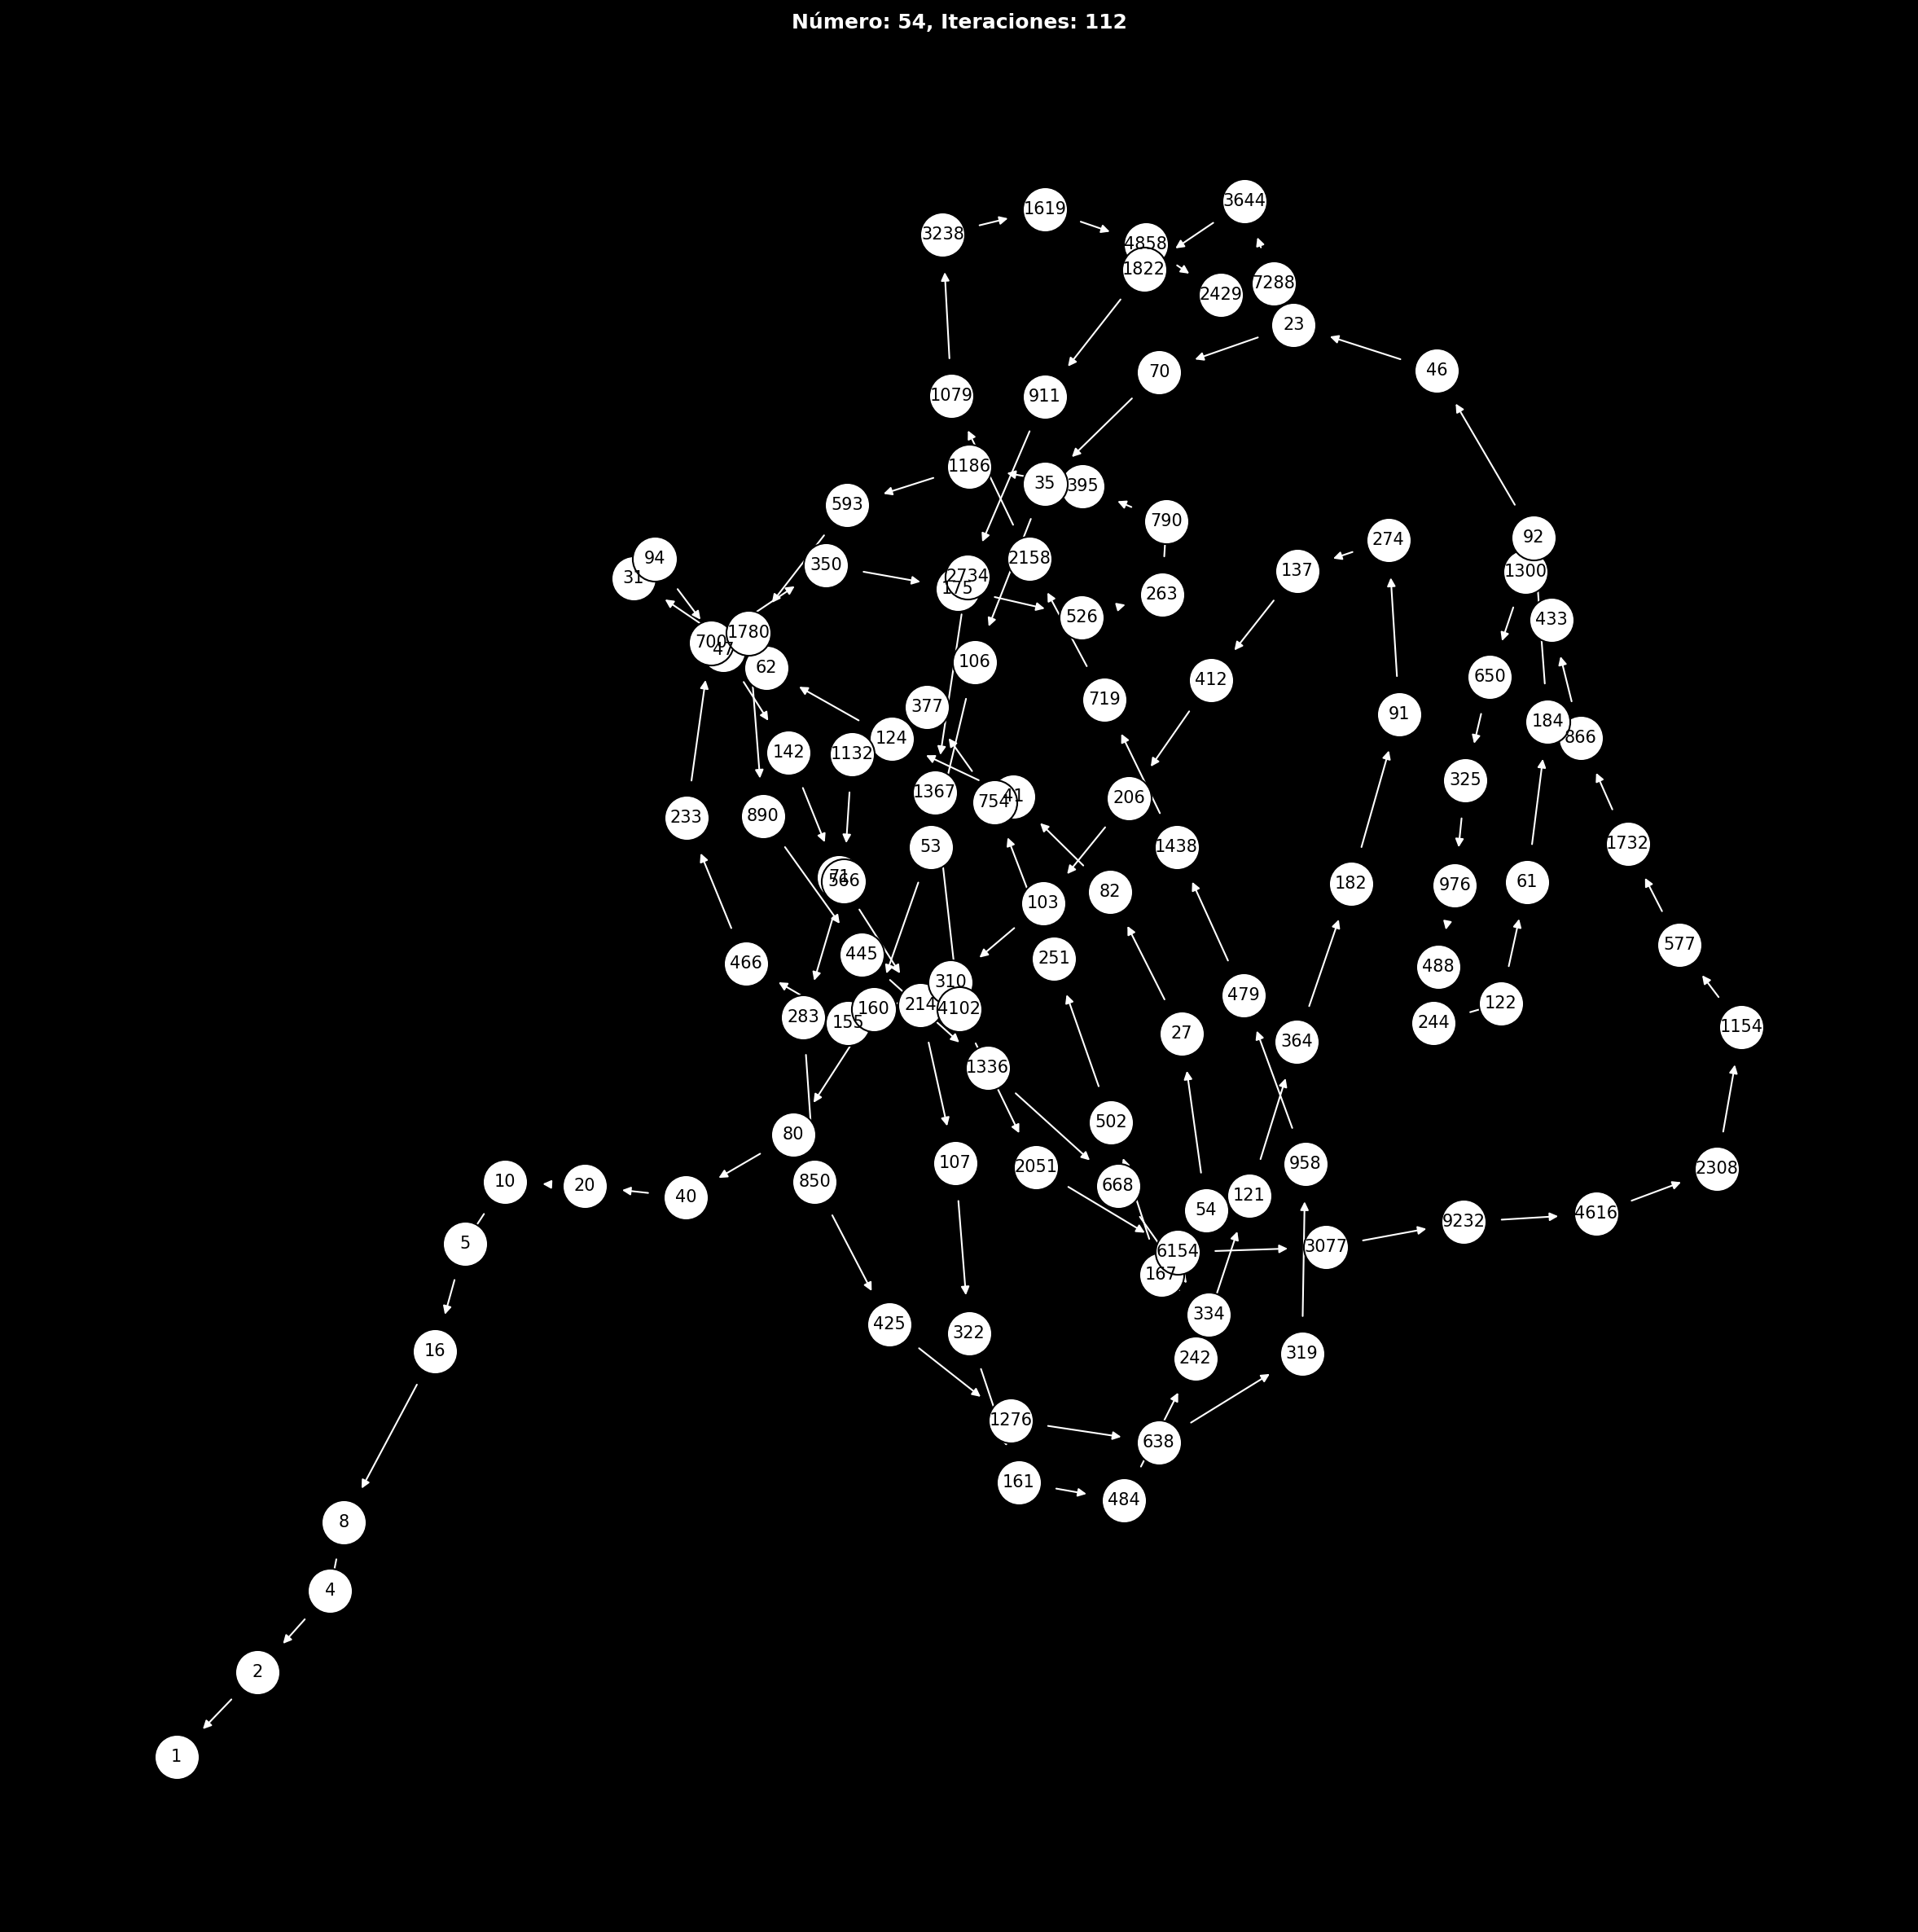

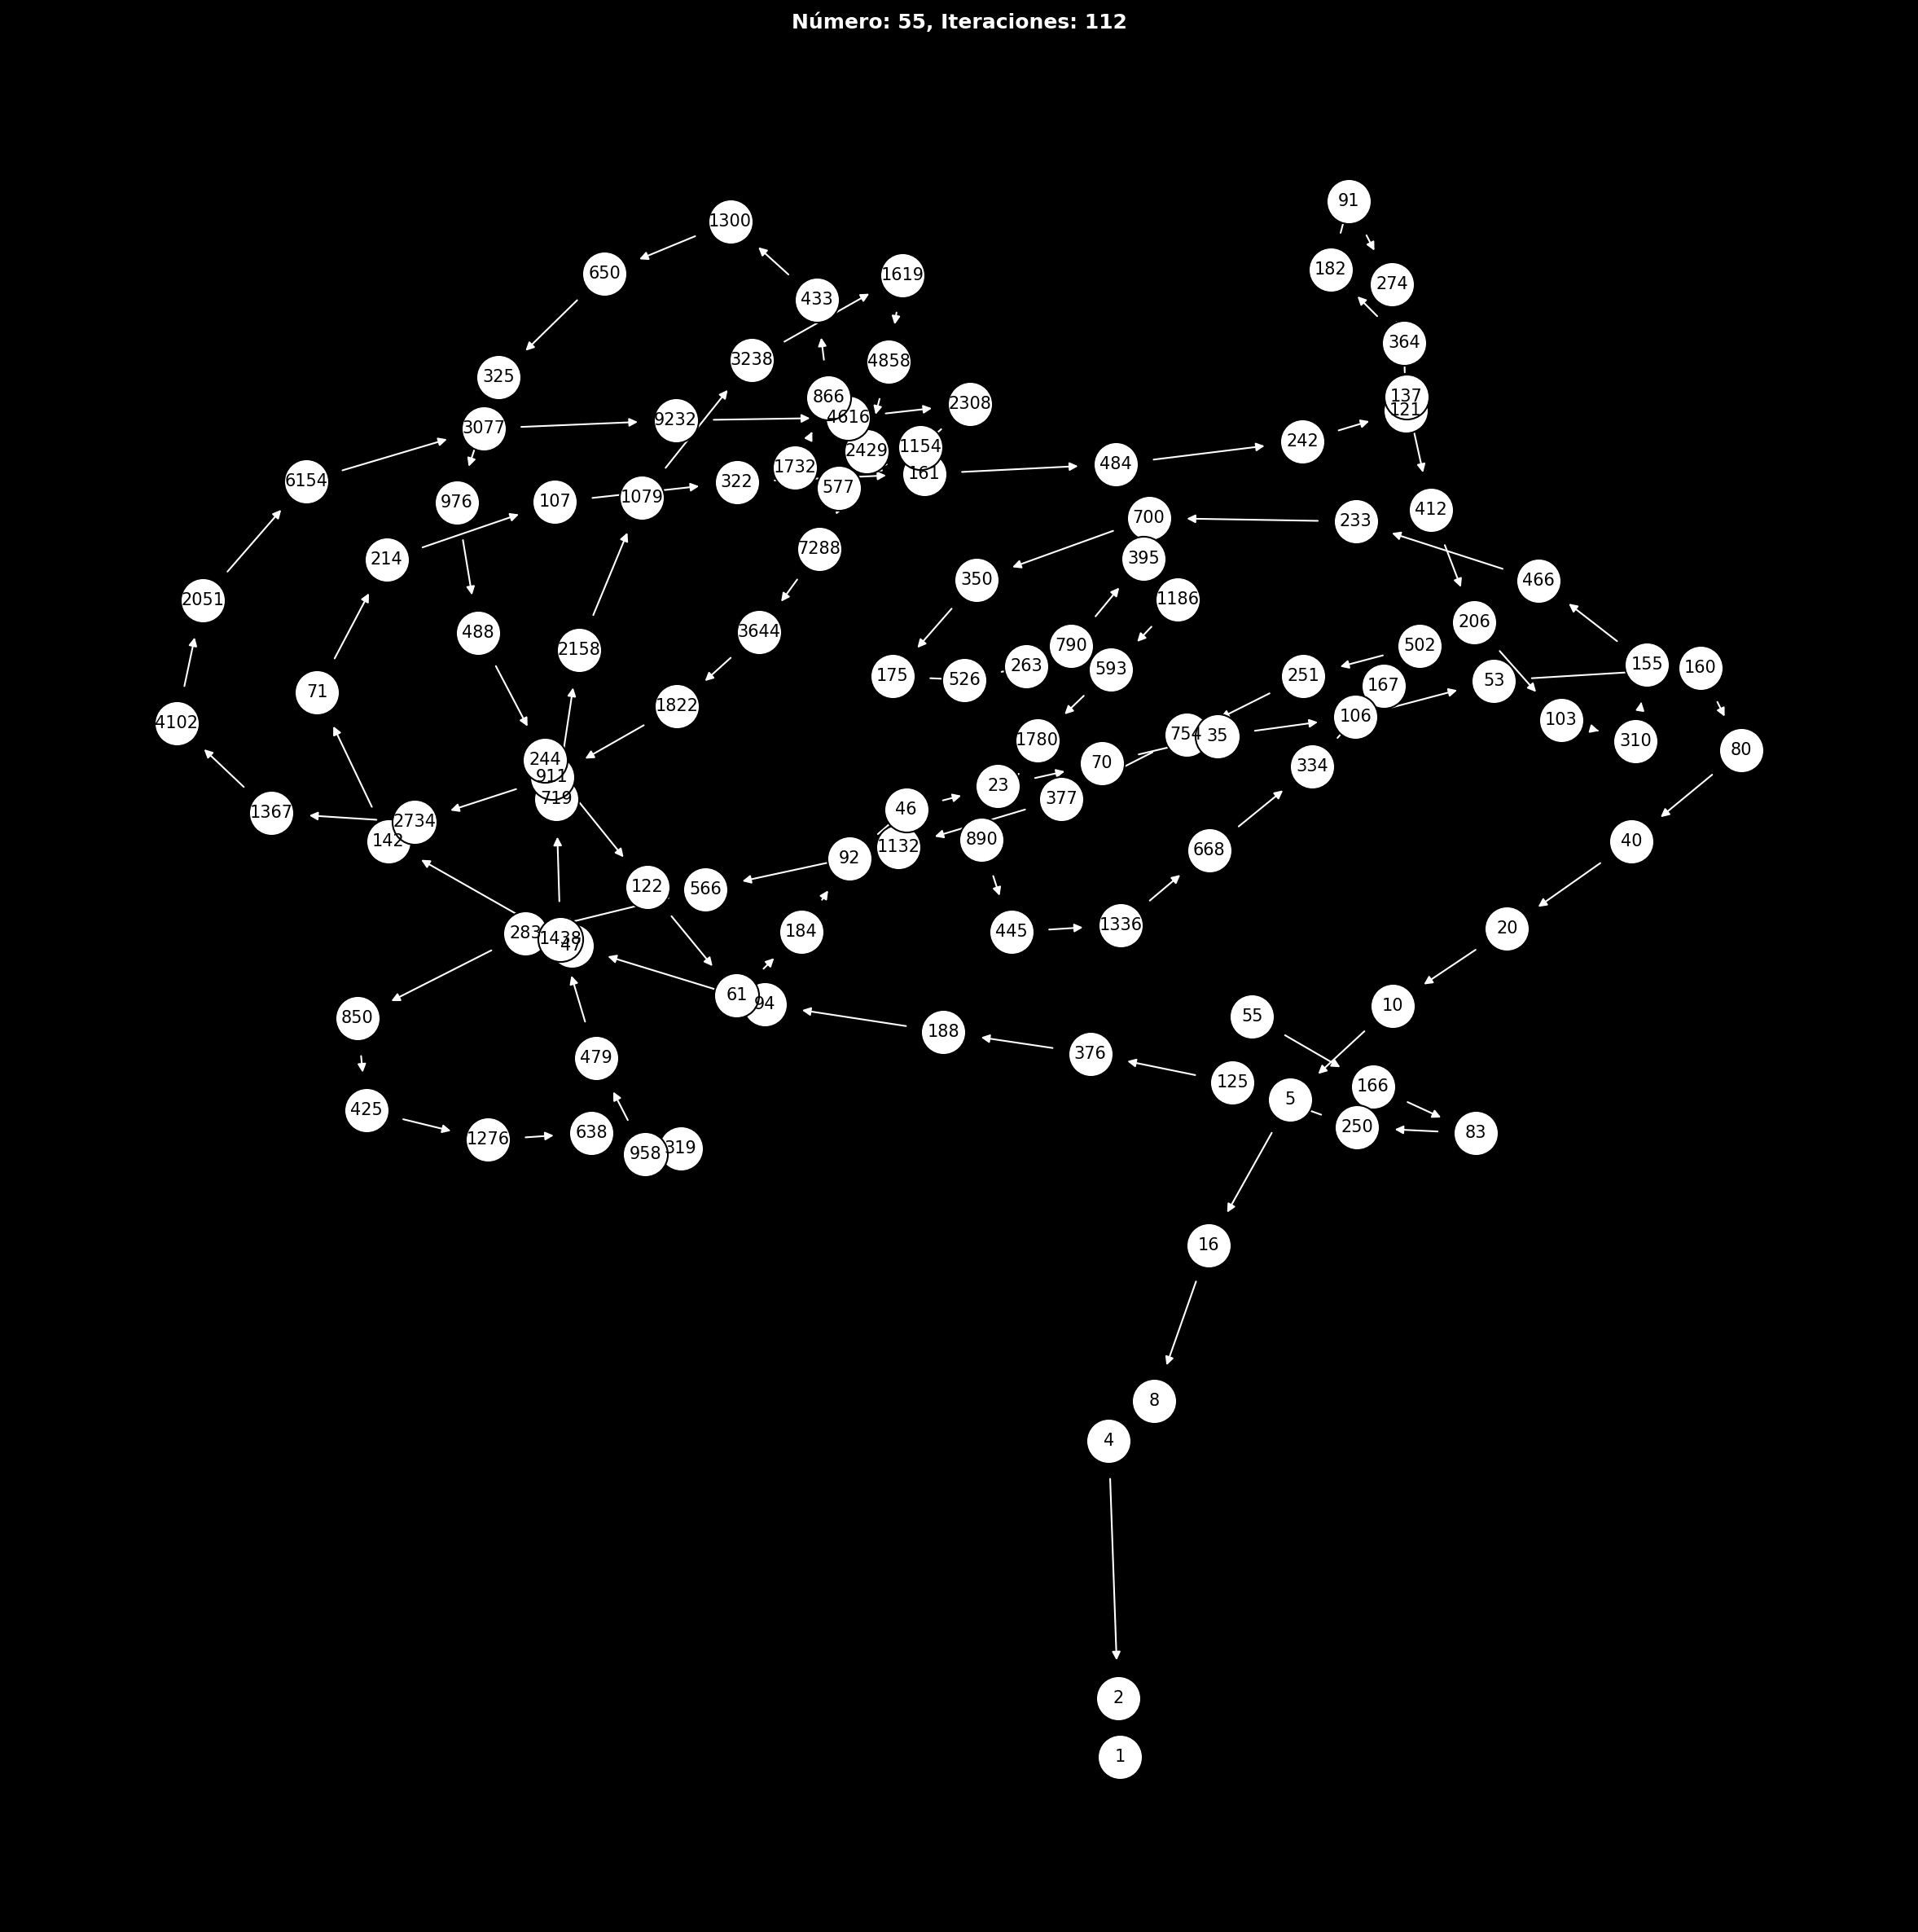

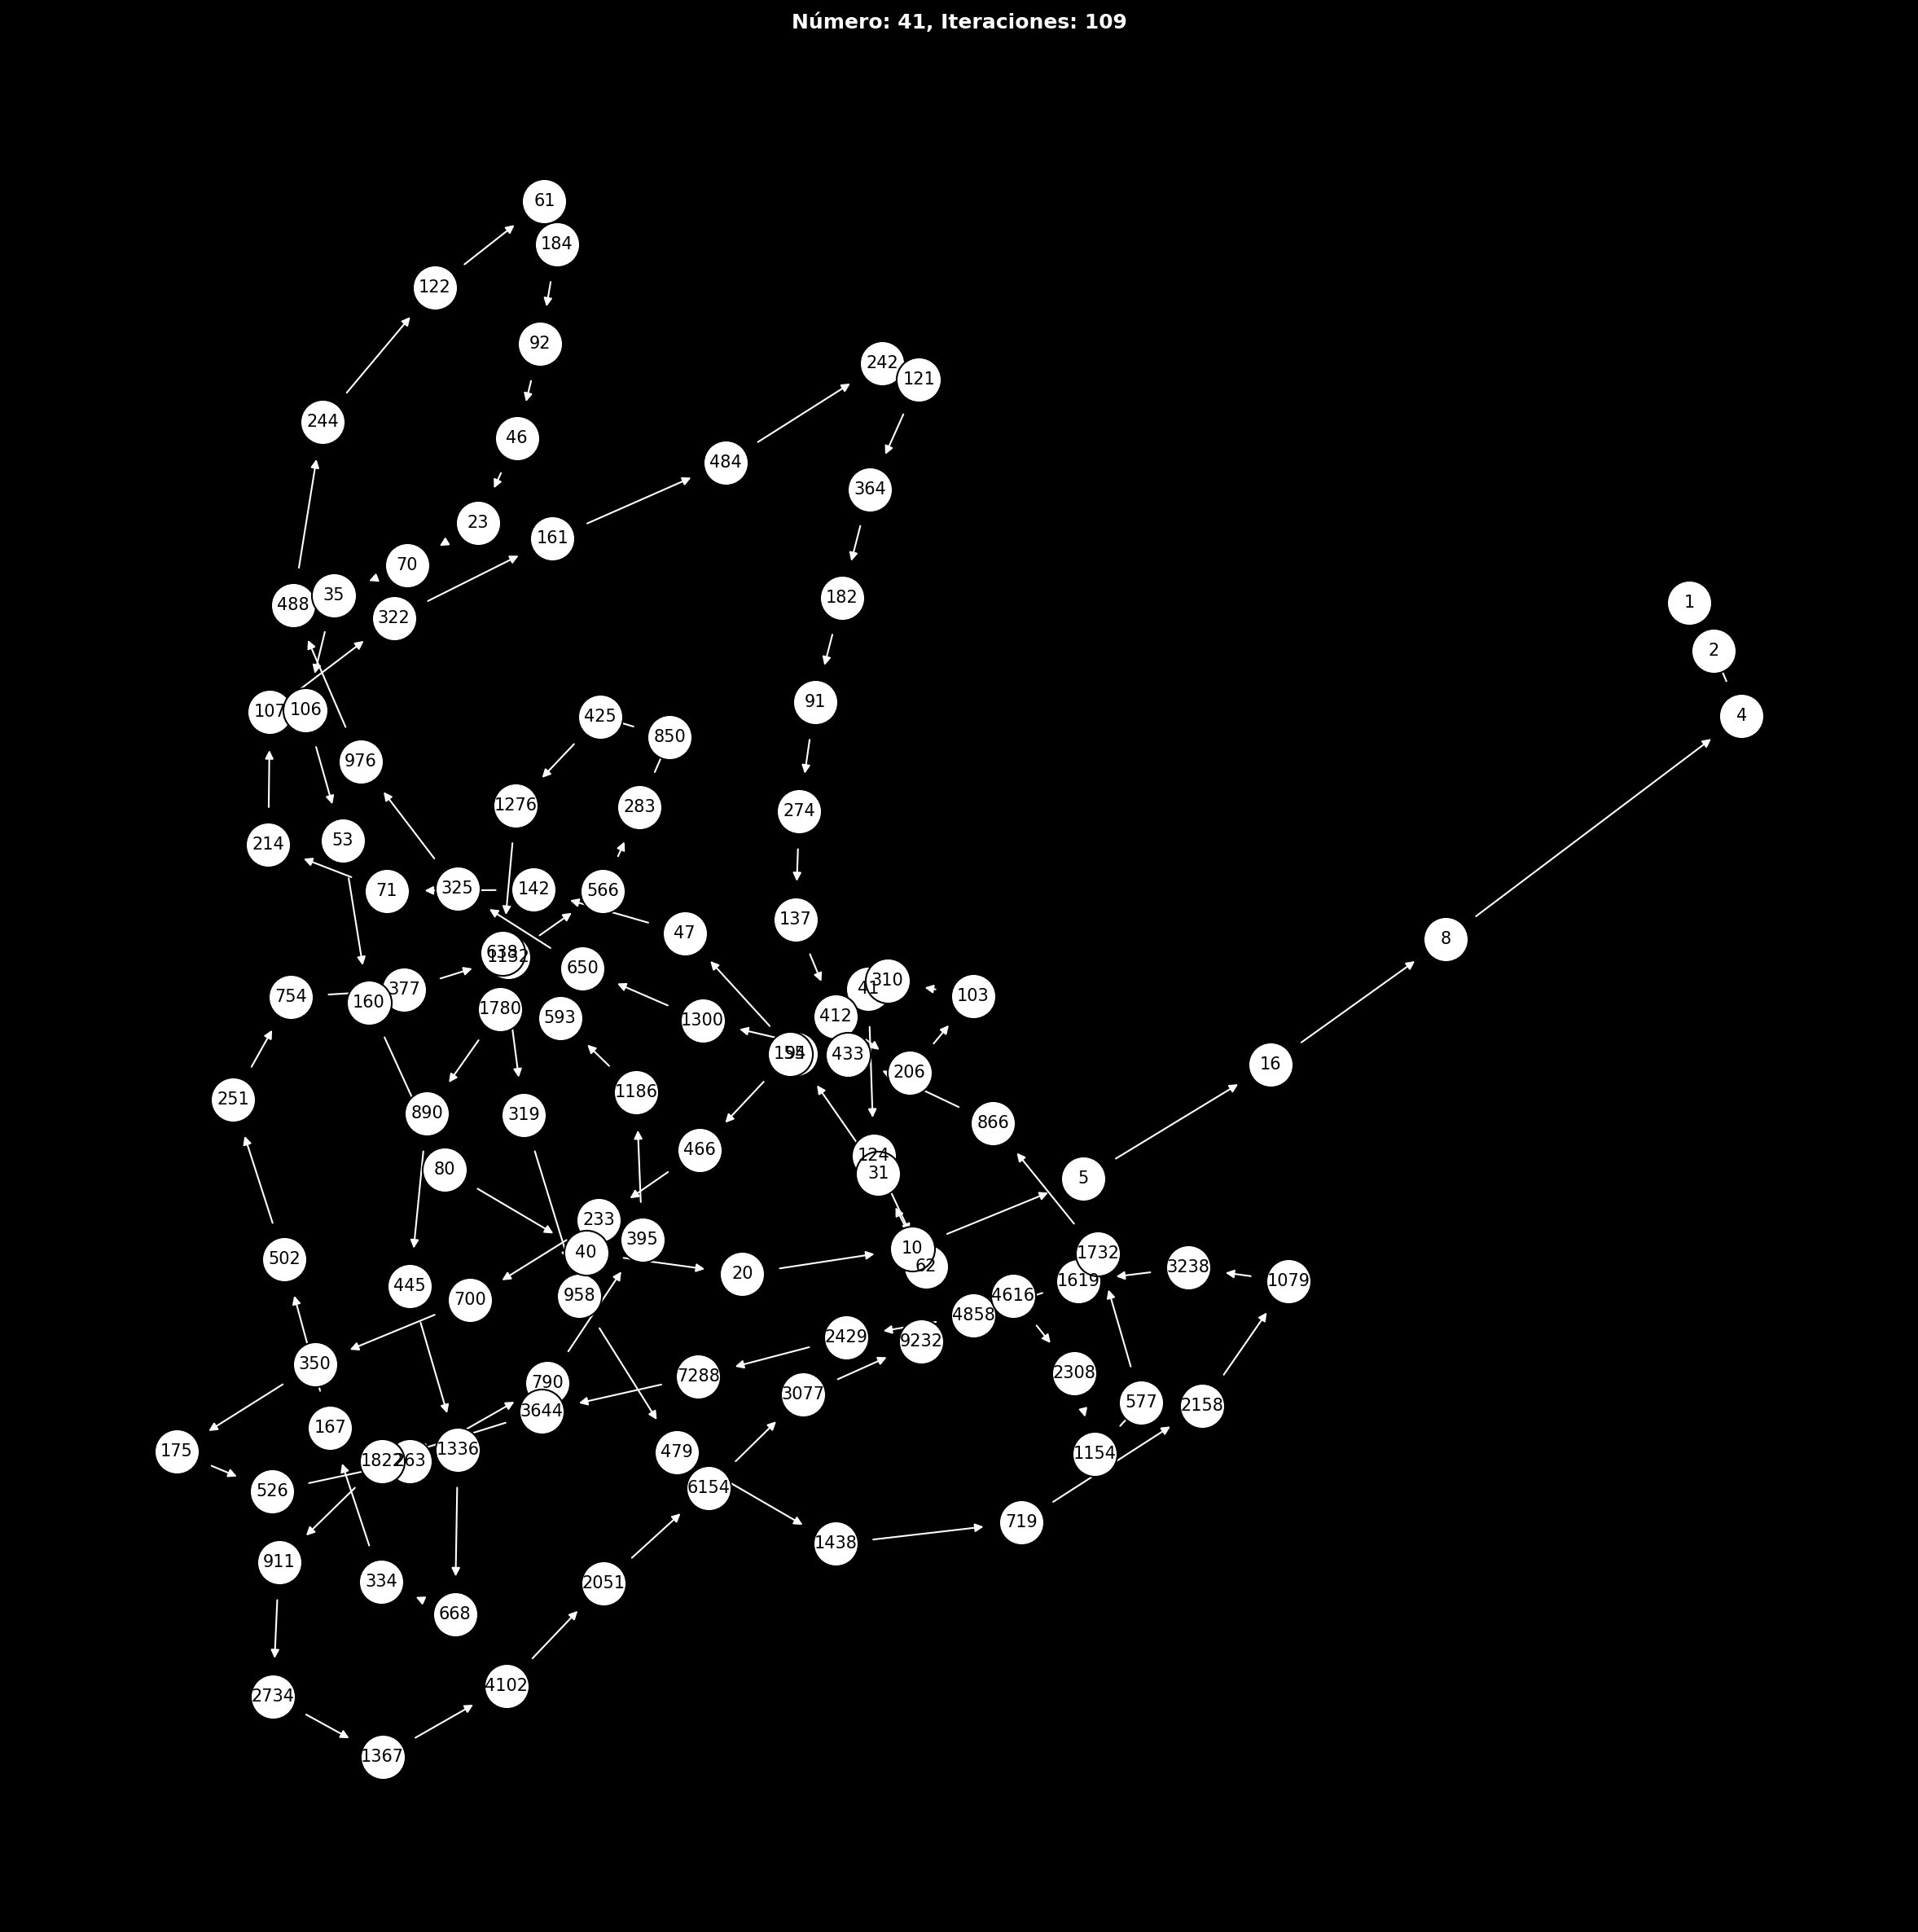

In [5]:
import matplotlib.pyplot as plt
import networkx as nx


# Crea una lista para guardar las listas de iteraciones
iteraciones_totales = []

# Itera los números de interés y guarda las iteraciones de cada número
numeros = [27, 31, 54, 55, 41]
for i in numeros:
    iteraciones = collatz(i)
    iteraciones_totales.append(iteraciones)

# Crea un gráfico dirigido para cada lista de iteraciones
for i, iteraciones in enumerate(iteraciones_totales):
    plt.figure(figsize=(20, 20))
    G = nx.DiGraph()
    for j in range(len(iteraciones) - 1):
        G.add_edge(iteraciones[j], iteraciones[j+1])
    
    # Define la posición de los nodos
    pos = nx.spring_layout(G)

    # Dibuja los nodos
    nx.draw_networkx_nodes(G, pos=pos, node_size=700, node_color='w', edgecolors='k')

    # Dibuja las etiquetas de los nodos
    labels = {n: n for n in G.nodes()}
    nx.draw_networkx_labels(G, pos, labels, font_size=10, font_family='sans-serif')

    # Dibuja los bordes con flechas blancas
    edges = G.edges()
    nx.draw_networkx_edges(G, pos=pos,node_size = 2000 ,edgelist=edges, edge_color='w', arrowsize=10, width=1)
    # Agrega el título con el número de iteraciones
    plt.title(f"Número: {numeros[i]}, Iteraciones: {len(iteraciones) - 1}", fontsize=12, fontweight='bold')

    # Muestra el gráfico
    plt.axis('off')
    plt.show()






# Ley de Bentford

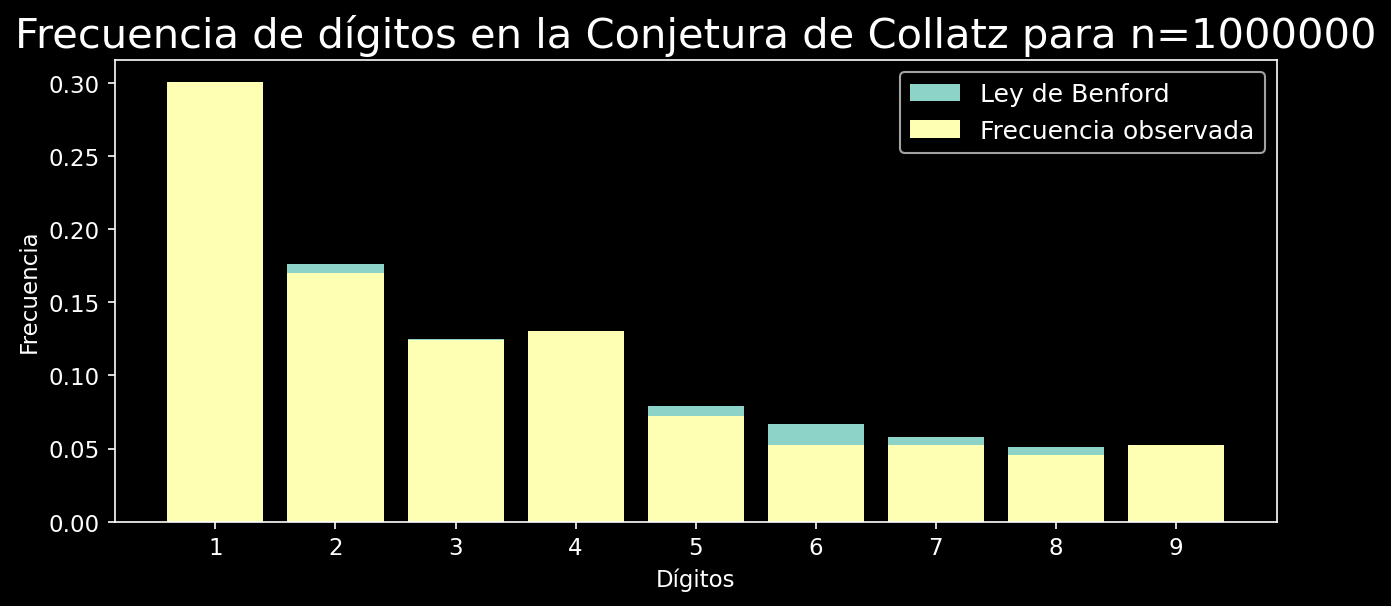

In [6]:
import matplotlib.pyplot as plt
import numpy as np

def calcular_frecuencia_digitos(lista_numeros):
    frecuencias = {i:0 for i in range(1,10)}
    for num in lista_numeros:
        primer_digito = int(str(num)[0])
        frecuencias[primer_digito] += 1
    total_numeros = len(lista_numeros)
    for i in frecuencias:
        frecuencias[i] /= total_numeros
    return frecuencias


numero_inicial = 10**6
iteraciones = collatz(numero_inicial)
frecuencias = calcular_frecuencia_digitos(iteraciones)

ley_benford = {i:np.log10(1 + 1/i) for i in range(1,10)}

fig, ax = plt.subplots()
ax.bar(ley_benford.keys(), ley_benford.values(), label='Ley de Benford')
ax.bar(frecuencias.keys(), frecuencias.values(), label='Frecuencia observada')
ax.set_xticks(list(range(1,10)))
ax.legend()
plt.title(f"Frecuencia de dígitos en la Conjetura de Collatz para n={numero_inicial}")
plt.xlabel('Dígitos')
plt.ylabel('Frecuencia')
plt.show()


# Demostración de la Conjetura de Collatz

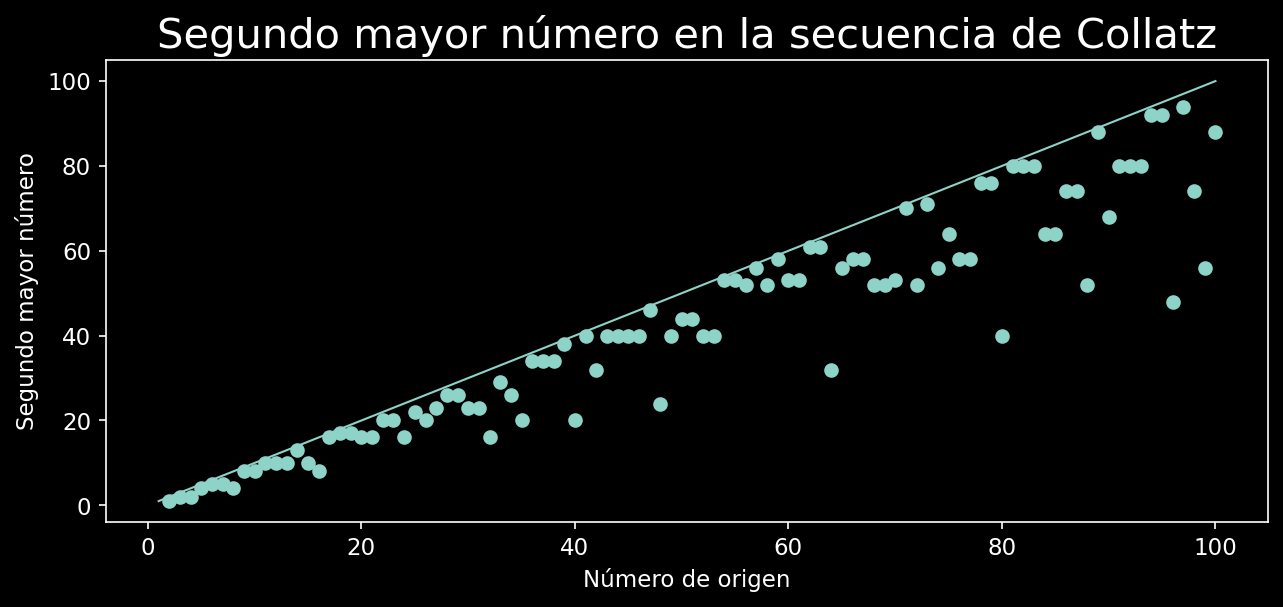

In [7]:
# Genera una lista de 100 números de origen
numeros_origen = list(range(1, 101))

# Calcula el segundo mayor número en cada secuencia de Collatz correspondiente a los números de origen
numeros_secundarios = []
for n in numeros_origen:
    secuencia = list(collatz(n))
    secuencia.sort(reverse=True)
    segundo_mayor = None
    for num in secuencia:
        if num < n:
            segundo_mayor = num
            break
    numeros_secundarios.append(segundo_mayor)

# Grafica los resultados
import matplotlib.pyplot as plt
plt.scatter(numeros_origen, numeros_secundarios)
plt.title('Segundo mayor número en la secuencia de Collatz')
plt.xlabel('Número de origen')
plt.ylabel('Segundo mayor número')
plt.plot([1, 100], [1, 100])
plt.show()



In [8]:
upper_bounds = []
for n in range(1, 1301):
    seq = collatz(n)
    upper_bounds.append(max(seq))



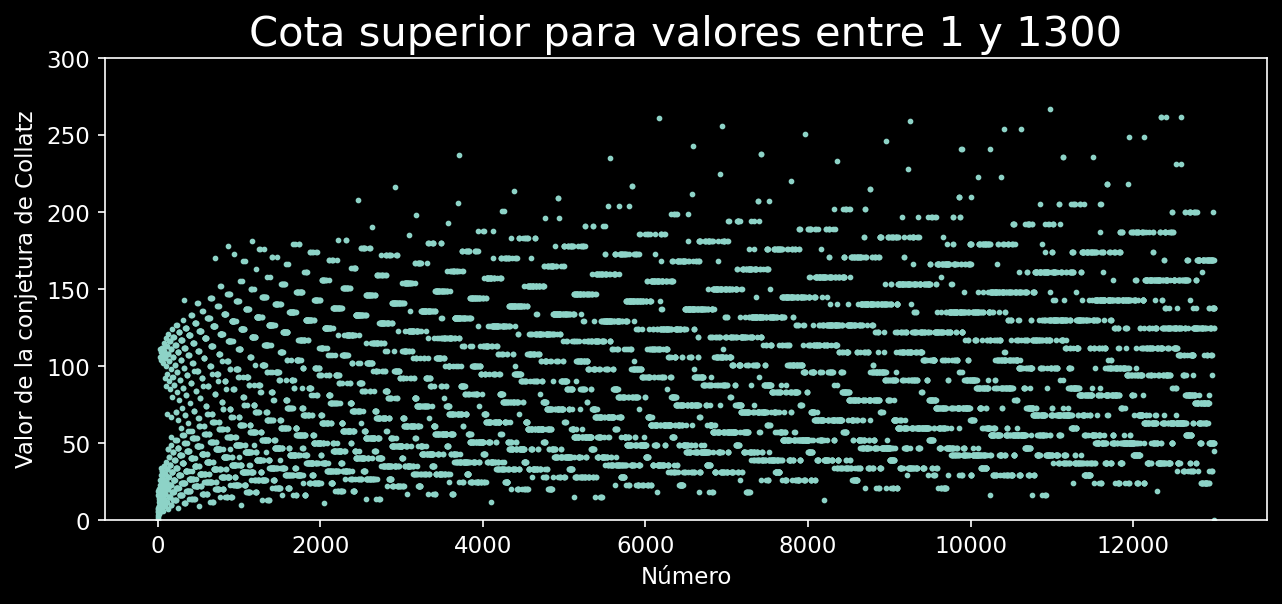

In [9]:
import matplotlib.pyplot as plt

# Función para la conjetura de Collatz
def collatz(n):
    count = 0
    while n != 1:
        if n % 2 == 0:
            n = n // 2
        else:
            n = 3 * n + 1
        count += 1
    return count

# Valores de la conjetura de Collatz para los números del 1 al 1300
collatz_values = [0] * 13000
for i in range(1, 13000):
    n = i
    while n != 1:
        if n % 2 == 0:
            n = n // 2
        else:
            n = 3 * n + 1
        collatz_values[i-1] += 1

# Cota superior
upper_bound = 9232

# Crear el gráfico de dispersión
plt.scatter(range(1, 13001), collatz_values, s=3)

# Dibujar la línea horizontal superior correspondiente a la cota superior
plt.plot([0, 13000], [upper_bound, upper_bound], 'r--')

# Añadir etiquetas y título
plt.xlabel('Número')
plt.ylabel('Valor de la conjetura de Collatz')
plt.title('Cota superior para valores entre 1 y 1300')

plt.ylim(0, 300)
# Mostrar el gráfico
plt.show()

# Graficando el Coral de Collatz y fracasando en el intento

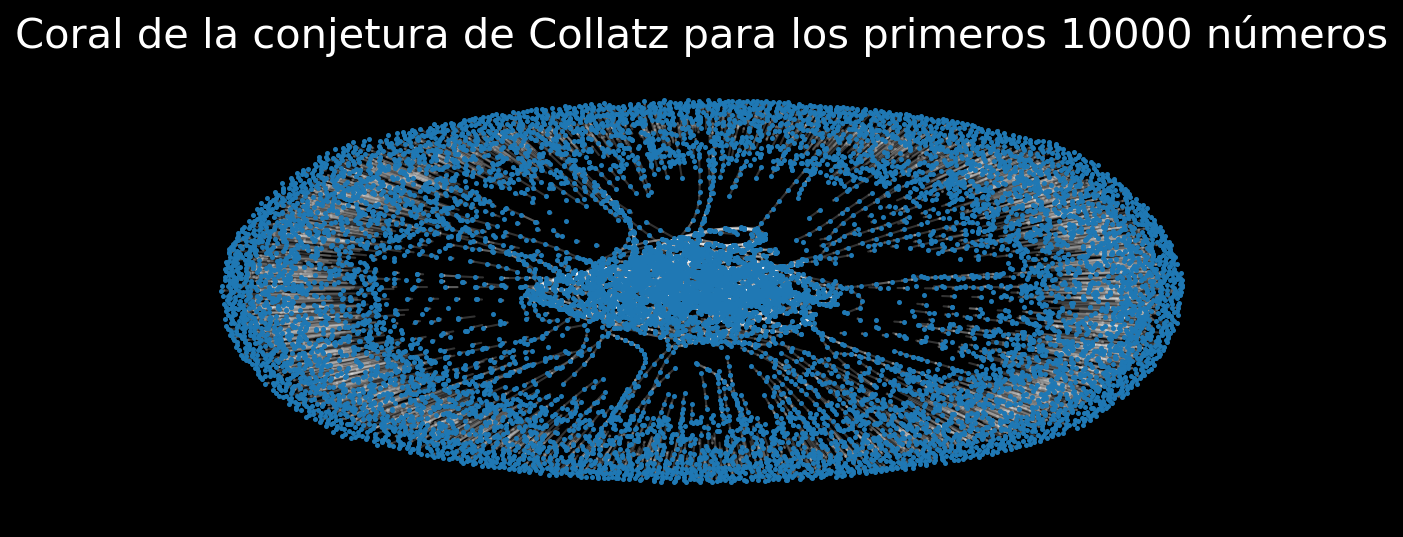

In [10]:
import networkx as nx
import matplotlib.pyplot as plt

# Función de la conjetura de Collatz
def collatz(n):
    if n % 2 == 0:
        return n // 2
    else:
        return 3*n + 1

# Crear grafo vacío
G = nx.DiGraph()

# Agregar nodos al grafo
for i in range(1, 10001):
    G.add_node(i)



# Agregar aristas al grafo
for i in range(1, 10001):
    j = collatz(i)
    G.add_edge(i, j)

# Graficar el grafo
pos = nx.spring_layout(G, seed=42)
nx.draw_networkx_nodes(G, pos, node_size=2)
nx.draw_networkx_edges(G, pos, alpha=0.2,edge_color='w', arrowsize=1)

# Configurar el gráfico
plt.axis("off")
plt.title("Coral de la conjetura de Collatz para los primeros 10000 números")
plt.show()


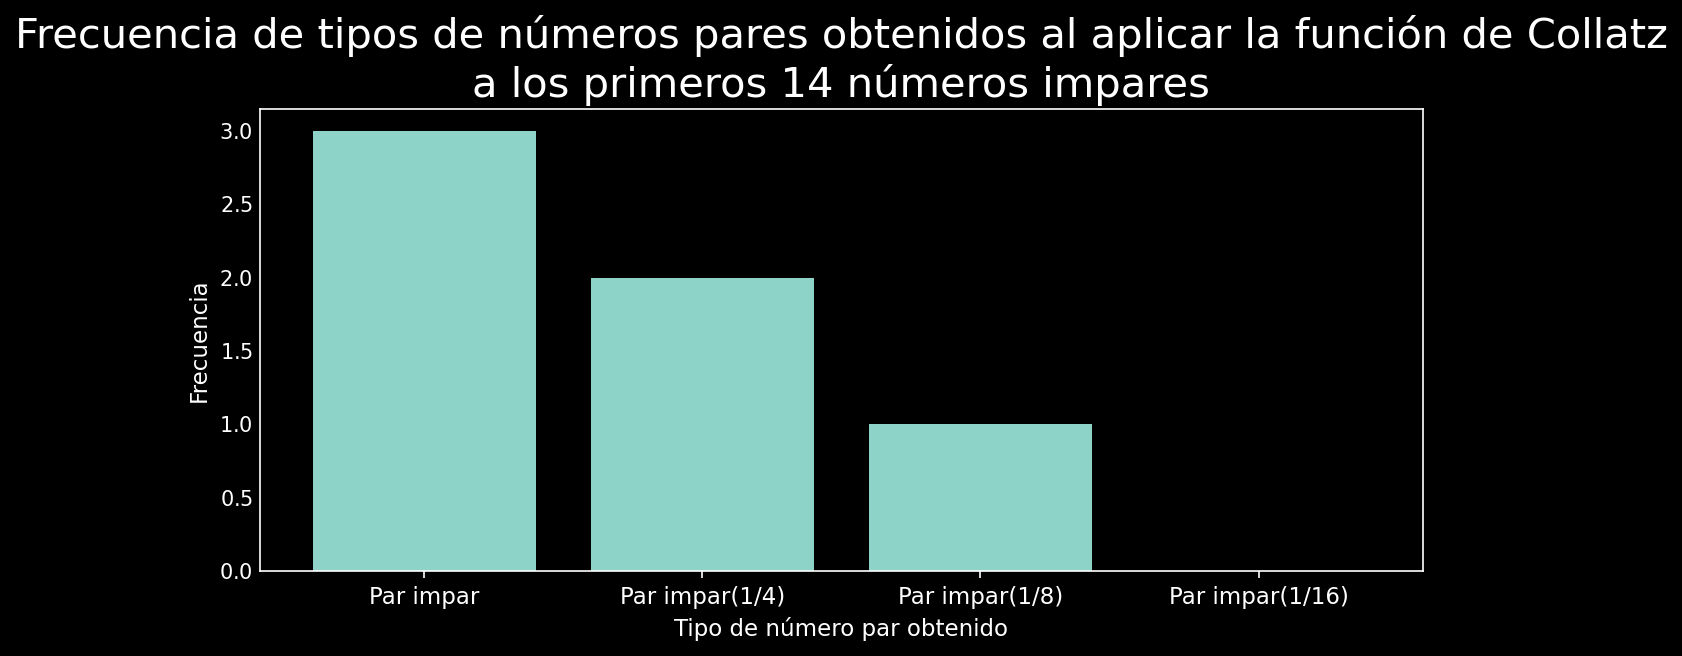

In [13]:
def collatz_even(n):
    return 3*n + 1 if n % 2 else n//2
impares = [2*i + 1 for i in range(14)]
from collections import Counter

counts = Counter()
for i in impares:
    even = collatz_even(i)
    while even % 2 == 0:
        counts[even] += 1
        even = collatz_even(even)
import matplotlib.pyplot as plt

x_labels = ["Par impar", "Par impar(1/4)", "Par impar(1/8)", "Par impar(1/16)"]
x = range(len(x_labels))
y = [counts[2], counts[8], counts[32], counts[128]]

plt.bar(x, y)
plt.xticks(x, x_labels)
plt.title("Frecuencia de tipos de números pares obtenidos al aplicar la función de Collatz\na los primeros 14 números impares")
plt.xlabel("Tipo de número par obtenido")
plt.ylabel("Frecuencia")
plt.show()


In [16]:
import matplotlib.pyplot as plt

odd_numbers = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27]

par = 0
impar_2 = 0
impar_4 = 0
impar_8 = 0
impar_16 = 0

for n in odd_numbers:
    while n != 1:
        if n % 2 == 0:
            n //= 2
            par += 1
        elif n % 4 == 1:
            n = (3*n + 1) // 2
            impar_2 += 1
        elif n % 8 == 3:
            n = (3*n + 1) // 2
            impar_4 += 1
        elif n % 16 == 5:
            n = (3*n + 1) // 2
            impar_8 += 1
        else:
            n = (3*n + 1) // 2
            impar_16 += 1


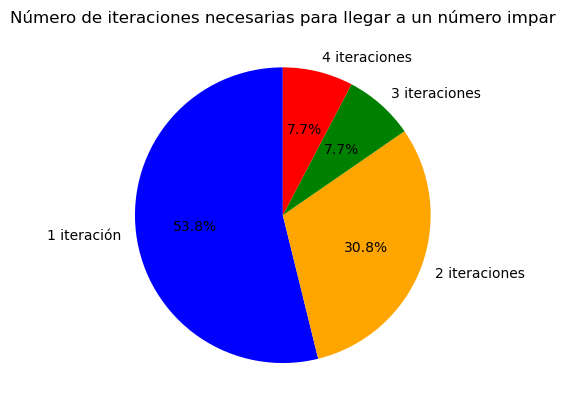

In [2]:
import matplotlib.pyplot as plt

# Datos
labels = ['1 iteración', '2 iteraciones', '3 iteraciones', '4 iteraciones']
sizes = [7, 4, 1, 1]
colors = ['blue', 'orange', 'green', 'red']

# Crear gráfico de pastel
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

# Añadir título
plt.title('Número de iteraciones necesarias para llegar a un número impar')

# Mostrar gráfico
plt.show()

